# Natural Language Processing On Books 2

10 books from each of the below genres were cleaned and preprocessed into .txt files.
* Romance
* Mystery
* Thriller
* Horror
* Scifi
* Fantasy

The aim of this notebook is to:
1. Perform basic sentiment analysis on the books.
2. Investigate polarity of books across different genres and when each book is split into segments.

In [3]:
import glob
import pandas as pd
import numpy as np
import nltk
import re
import string
from textblob import TextBlob, Word, Blobber
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt
import math

In [4]:
#df.to_pickle("./books_dataframe.pkl")
df = pd.read_pickle("./books_dataframe.pkl")

In [5]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['book_string'].apply(pol)
df['subjectivity'] = df['book_string'].apply(sub)

Text(0.5, 1.0, 'book polarities')

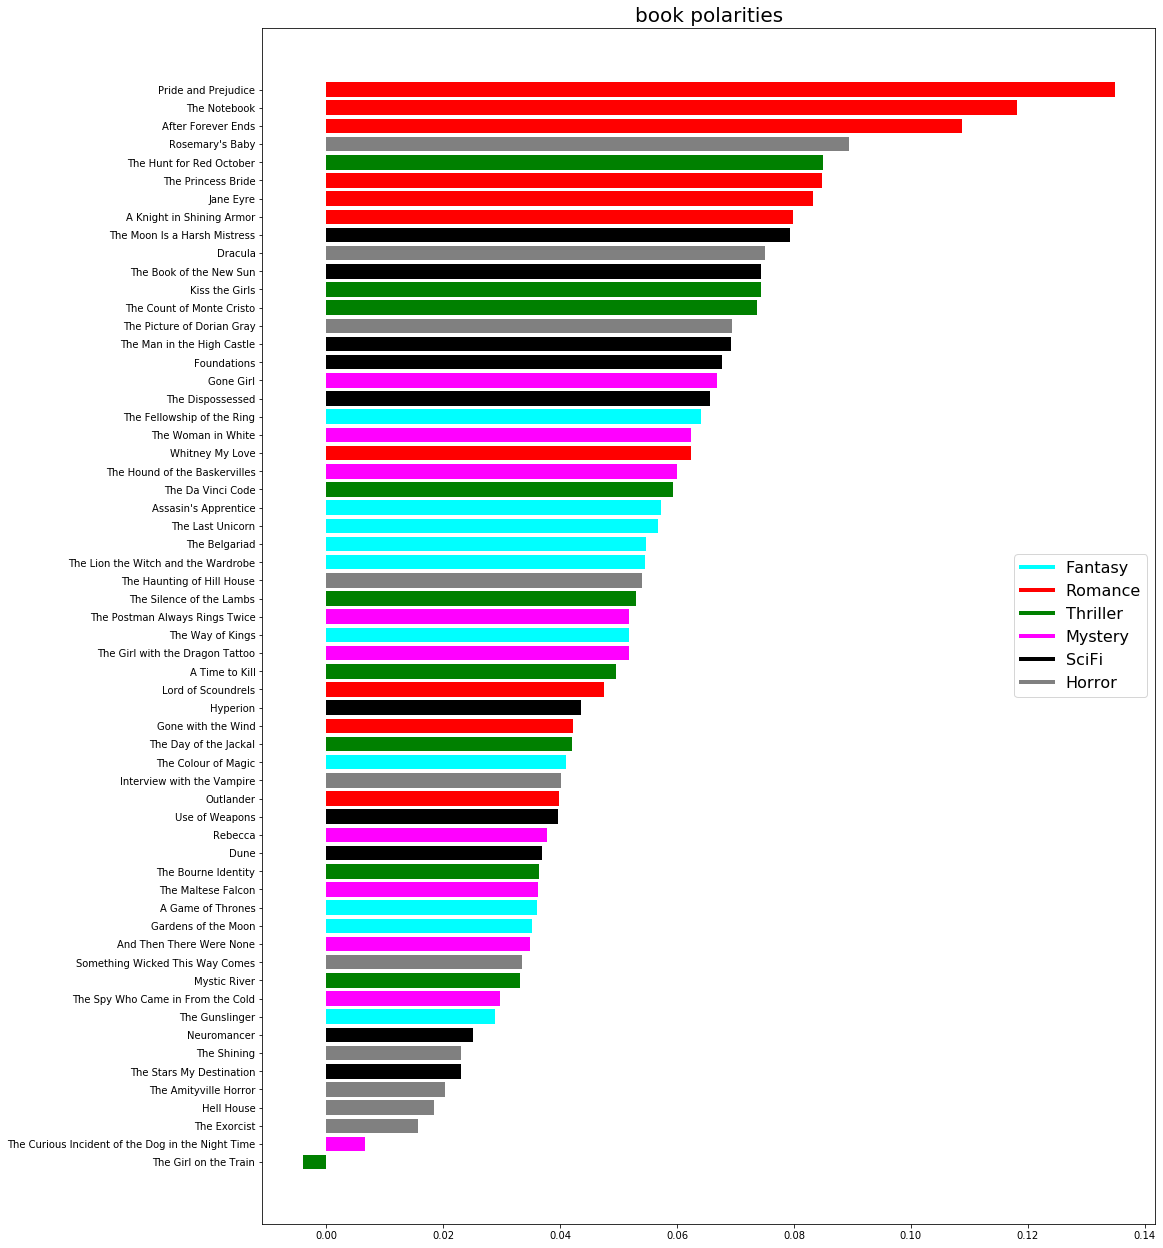

In [8]:
indices=df.index
polarity=df.polarity
polarities_sorted, book_names_sorted = zip(*sorted(zip(polarity, indices)))

color_map={'Fantasy':'cyan','Romance':'red','Thriller':'green','Mystery':'magenta','SciFi':'black','Horror':'grey'}
colors_unique=[color_map[df.loc[book].book_genre] for book in book_names_sorted]

plt.figure(figsize=(16,22))
plt.barh(book_names_sorted, polarities_sorted, align='center', color=colors_unique)
legend_elements = [Line2D([0], [0], color='cyan', lw=4, label='Fantasy'),
                   Line2D([0], [0], color='red', lw=4, label='Romance'),
                   Line2D([0], [0], color='green', lw=4, label='Thriller'),
                   Line2D([0], [0], color='magenta', lw=4, label='Mystery'),
                   Line2D([0], [0], color='black', lw=4, label='SciFi'),
                   Line2D([0], [0], color='grey', lw=4, label='Horror')]
plt.legend(handles=legend_elements, loc='right', prop={'size': 16})
#                   
#plt.yticks(book_names_sorted,polarities_sorted )
plt.title('book polarities', fontsize=20)

Text(0.5, 1.0, 'book subjectivities')

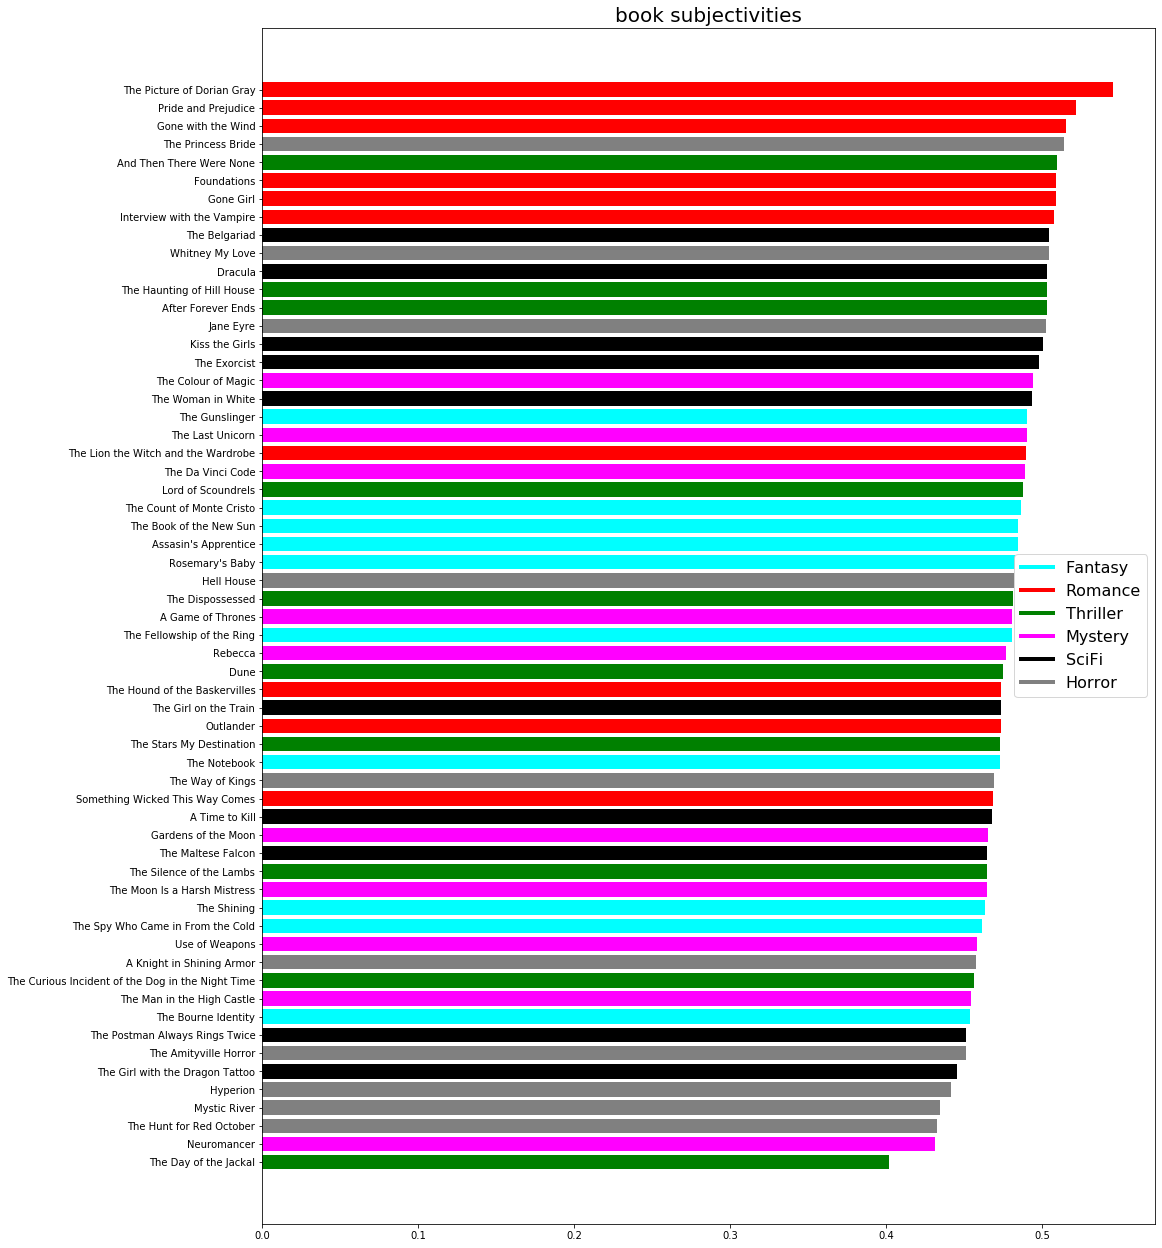

In [9]:
indices=df.index
subjectivity=df.subjectivity
subjectivities_sorted, book_names_sorted = zip(*sorted(zip(subjectivity, indices)))

plt.figure(figsize=(16,22))
plt.barh(book_names_sorted, subjectivities_sorted, align='center', color=colors_unique)
legend_elements = [Line2D([0], [0], color='cyan', lw=4, label='Fantasy'),
                   Line2D([0], [0], color='red', lw=4, label='Romance'),
                   Line2D([0], [0], color='green', lw=4, label='Thriller'),
                   Line2D([0], [0], color='magenta', lw=4, label='Mystery'),
                   Line2D([0], [0], color='black', lw=4, label='SciFi'),
                   Line2D([0], [0], color='grey', lw=4, label='Horror')]
plt.legend(handles=legend_elements, loc='right', prop={'size': 16})
                   
#plt.yticks(book_names_sorted,polarities_sorted )
plt.title('book subjectivities', fontsize=20)

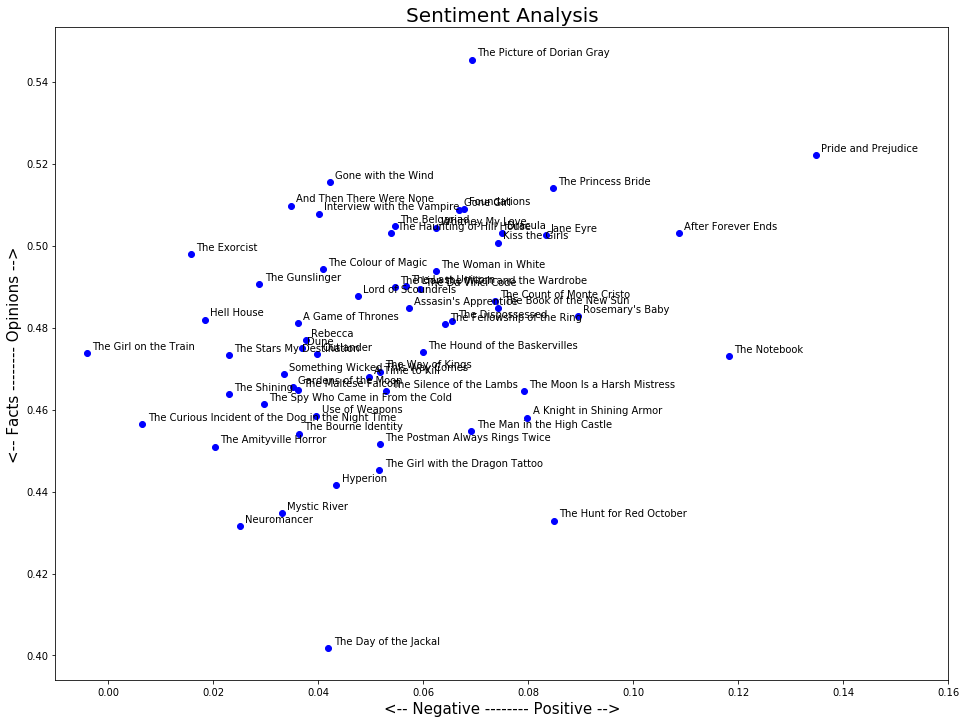

In [10]:
# Let's plot the results
plt.rcParams['figure.figsize'] = [16, 12]

for index, book in enumerate(df.index):
    x = df.polarity.loc[book]
    y = df.subjectivity.loc[book]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, book, fontsize=10)
    plt.xlim(-.01, .16) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [11]:
# Split each routine into 10 parts

def split_text(text, n=200):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [12]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in df.book_string:
    split = split_text(t)
    list_pieces.append(split)

In [13]:
# Calculate the polarity for each piece of text
polarity_text = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_text.append(polarity_piece)

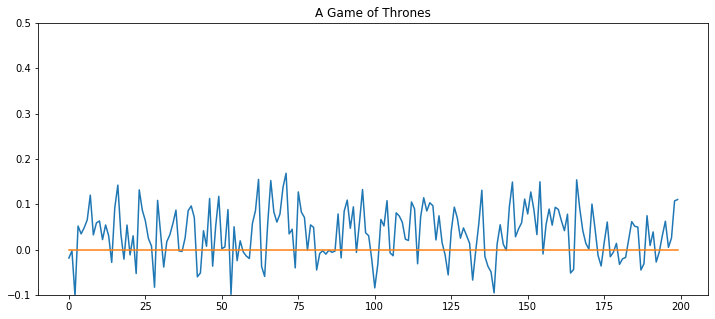

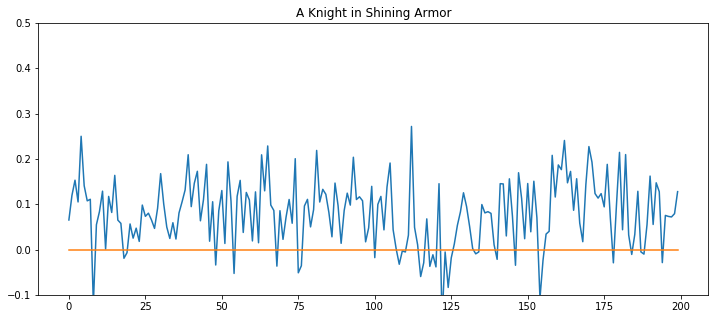

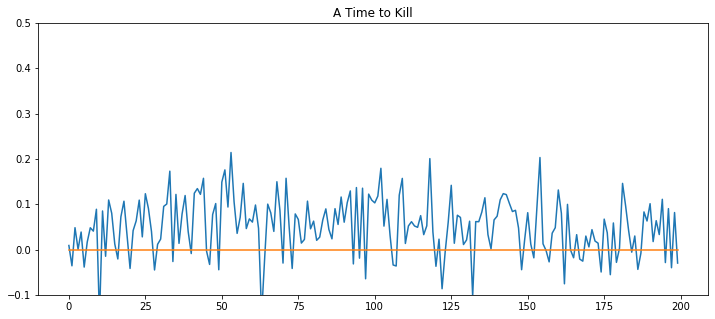

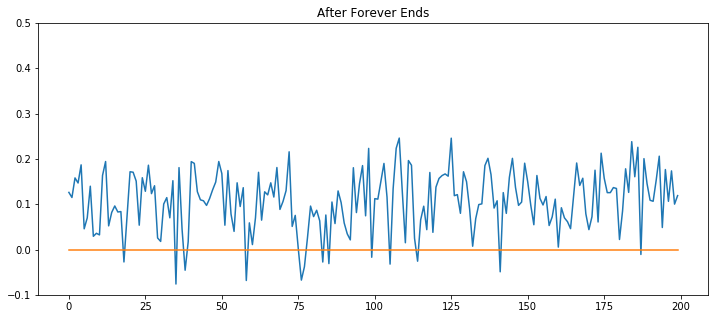

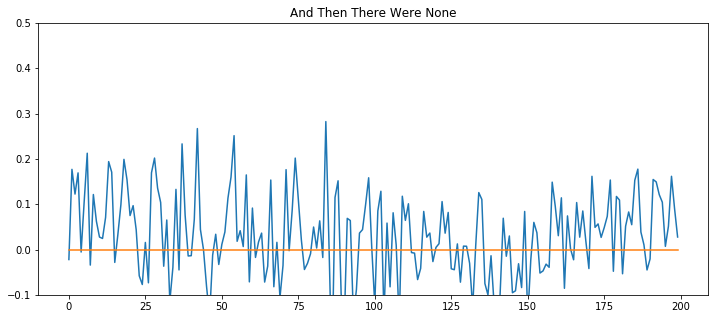

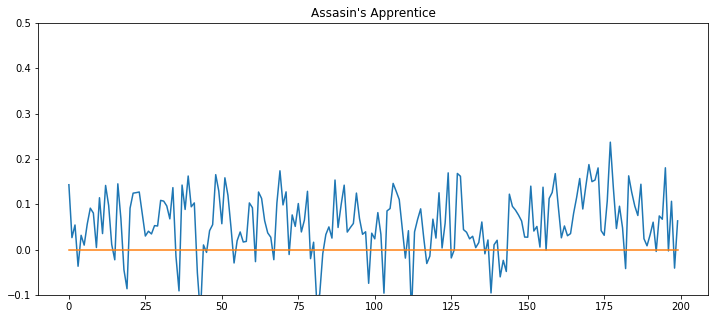

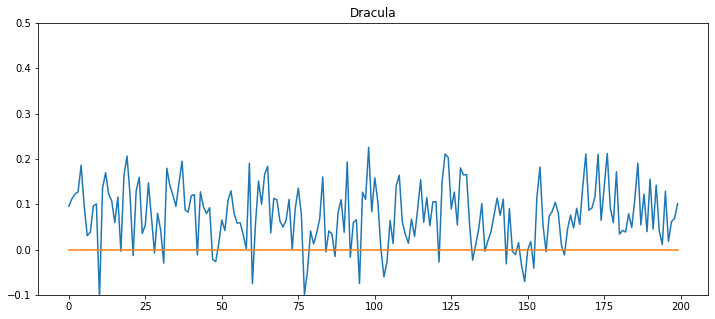

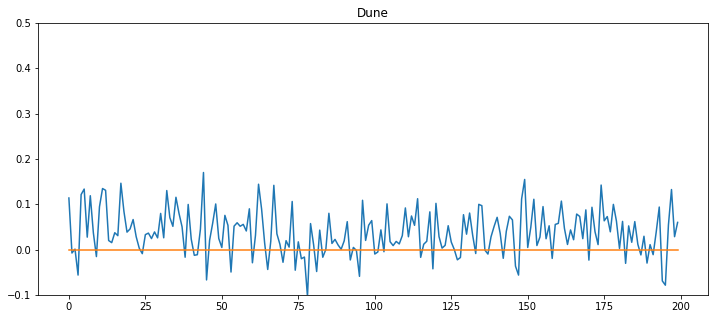

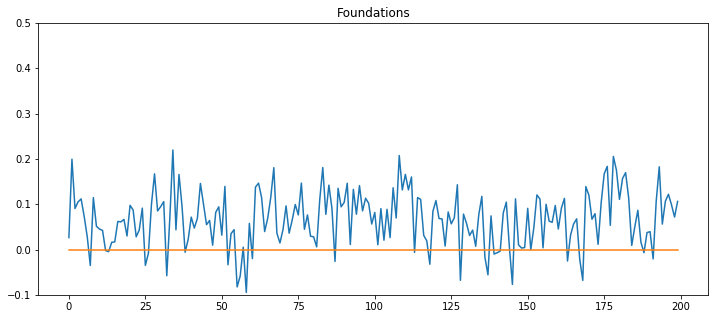

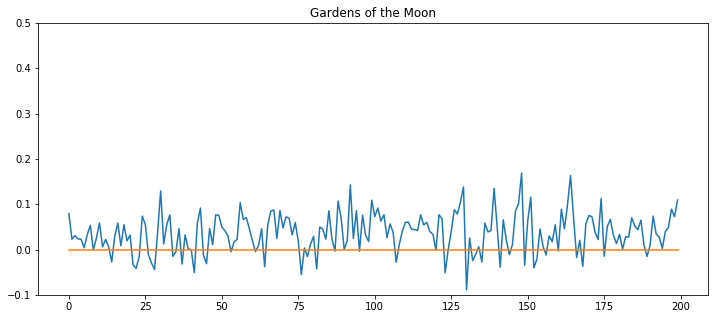

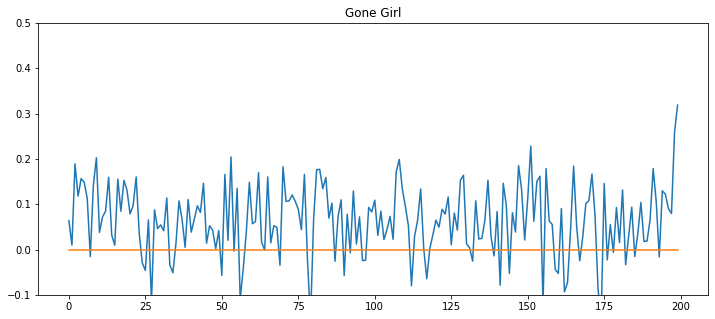

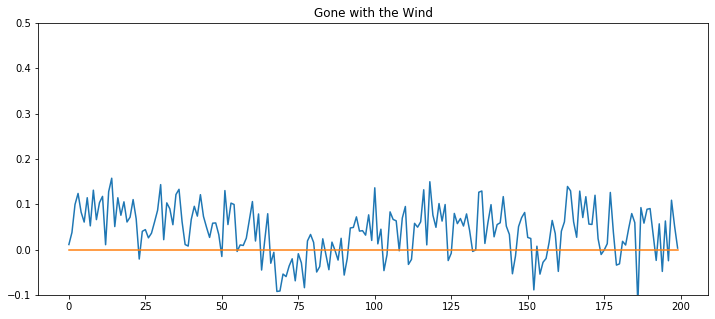

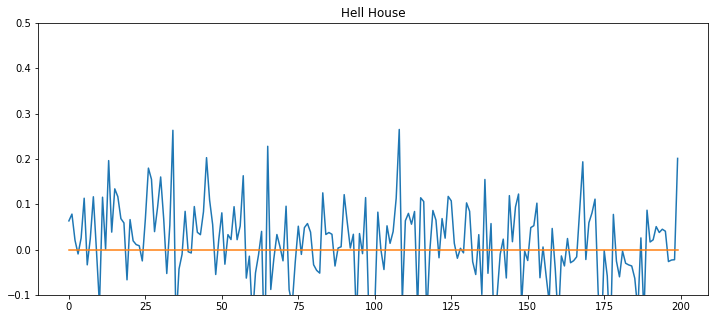

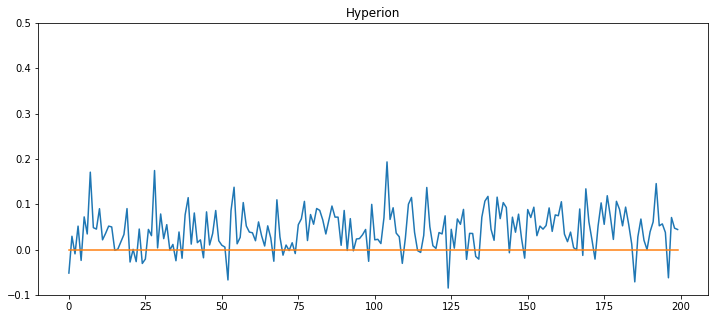

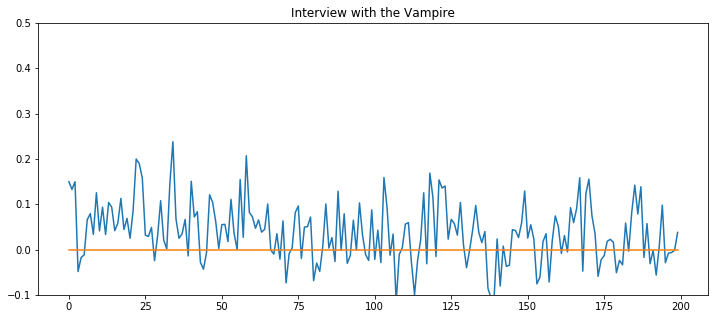

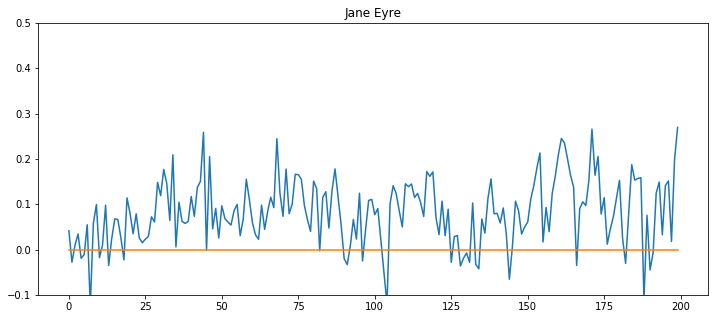

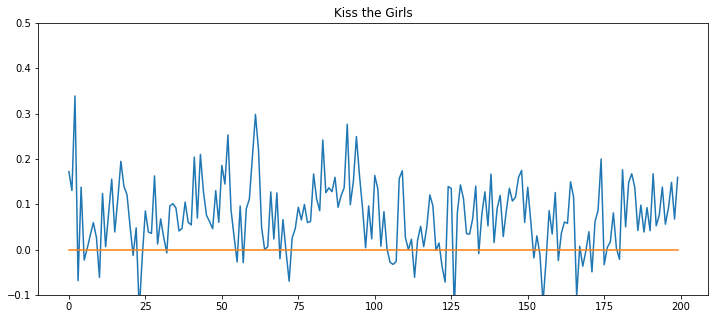

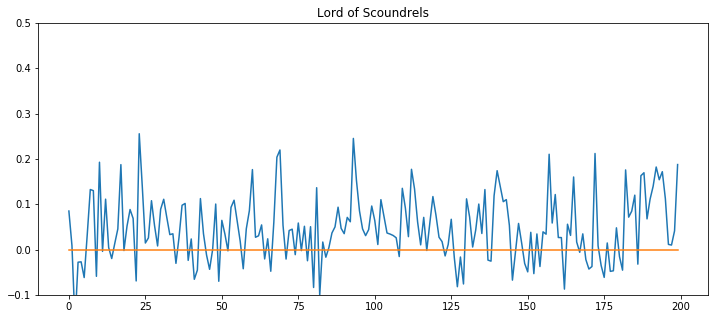

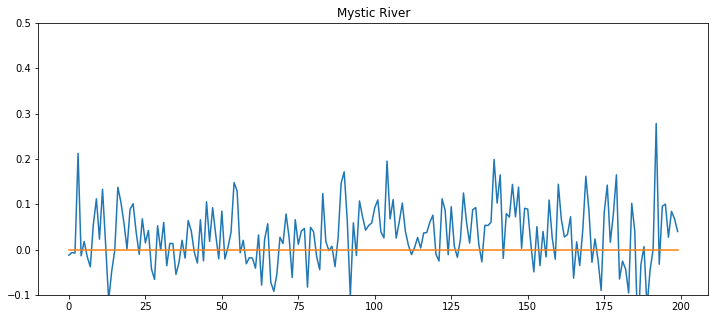

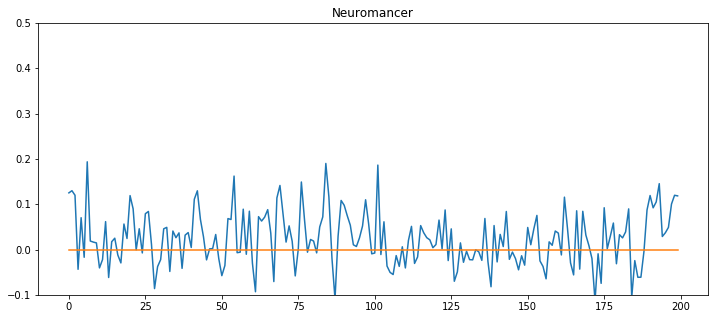

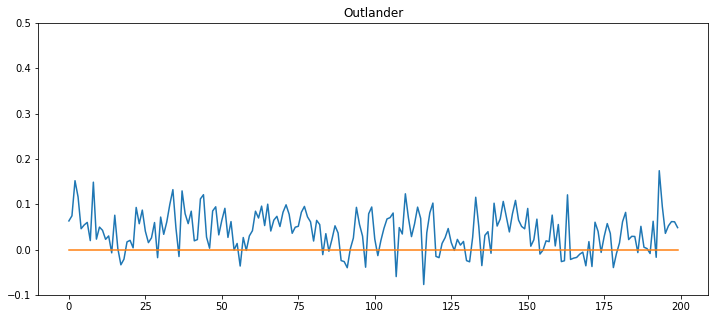

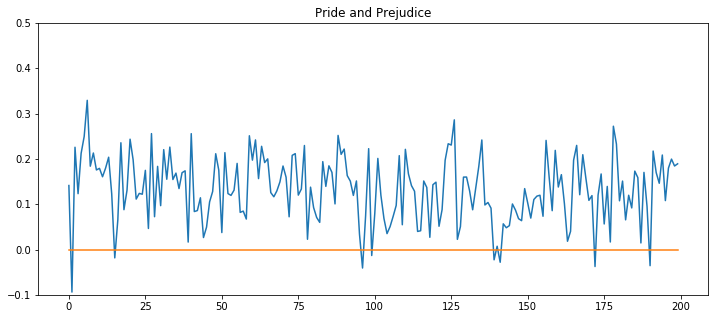

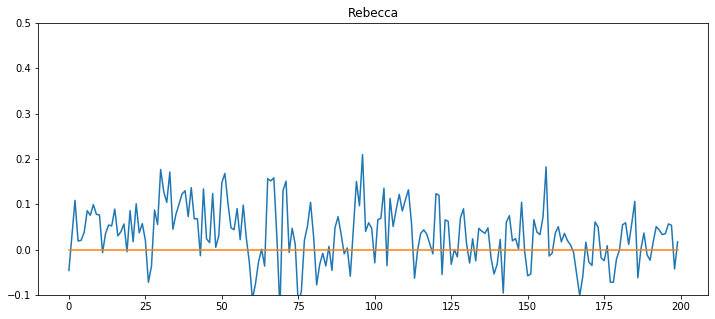

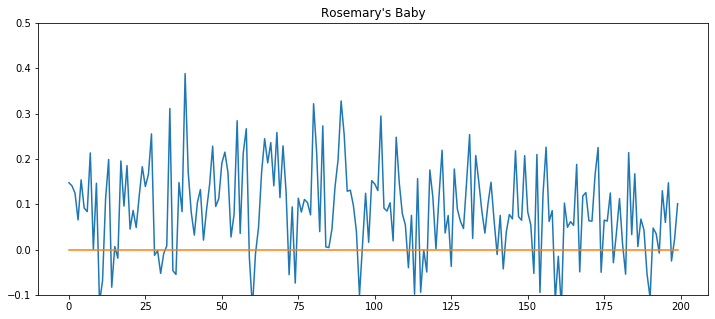

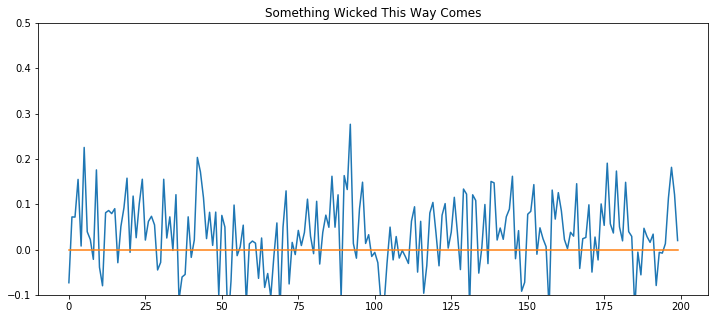

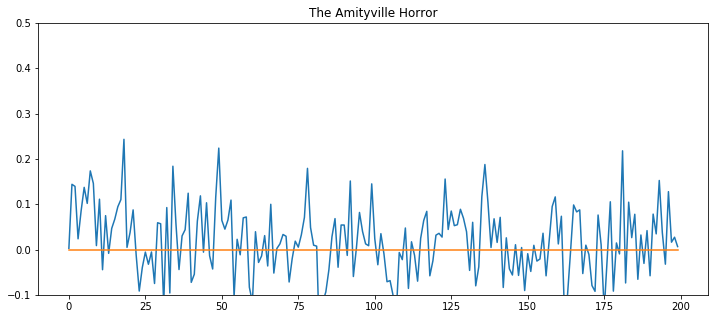

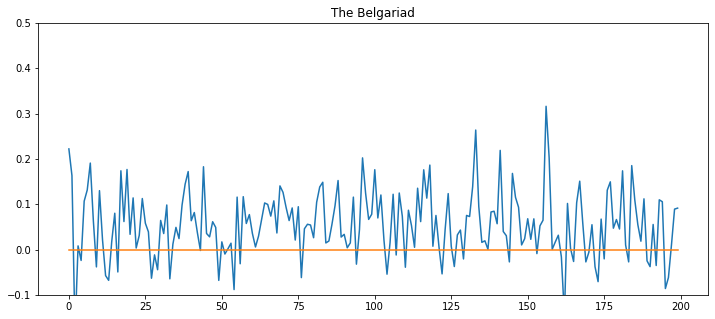

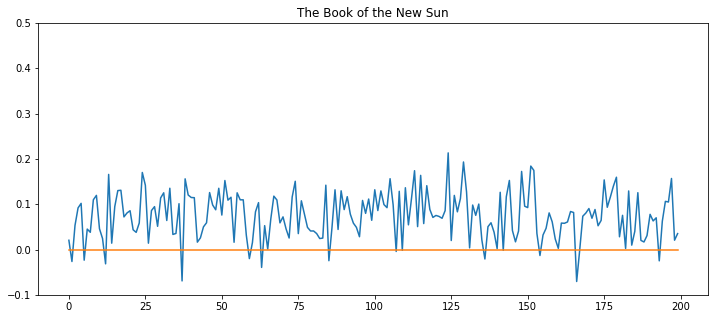

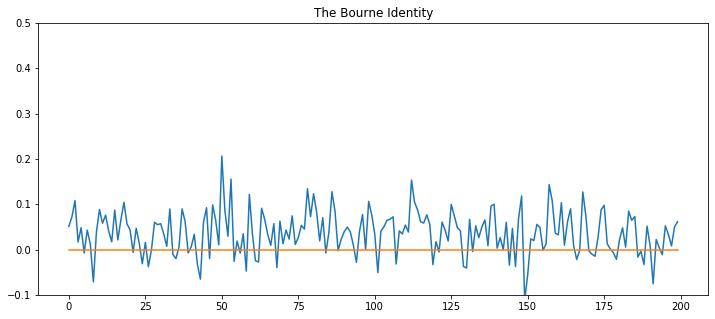

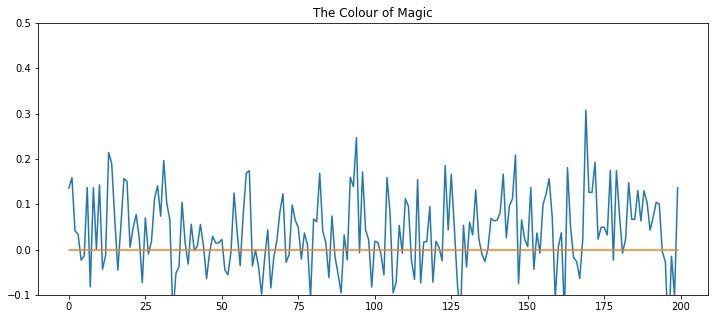

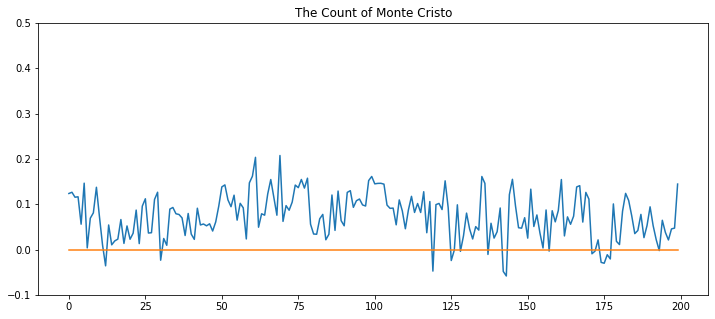

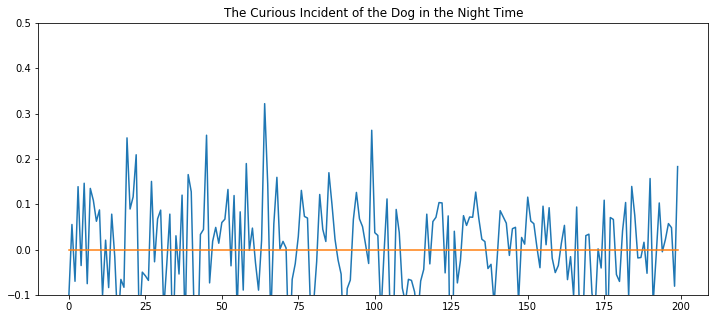

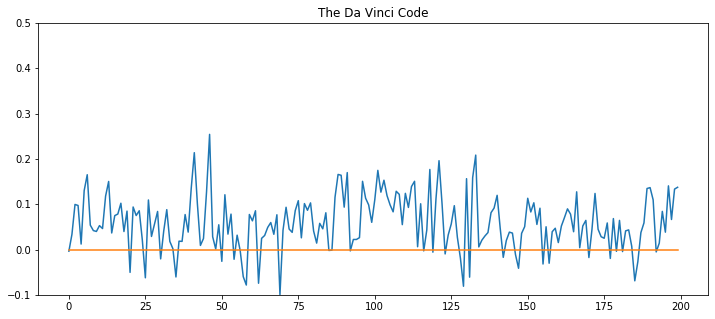

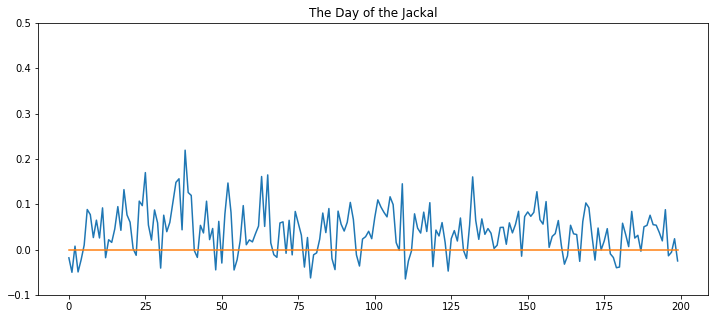

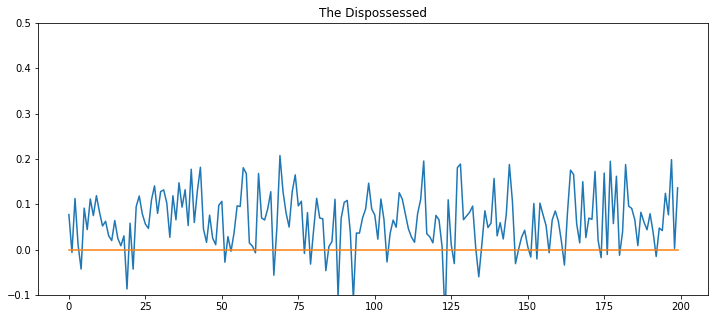

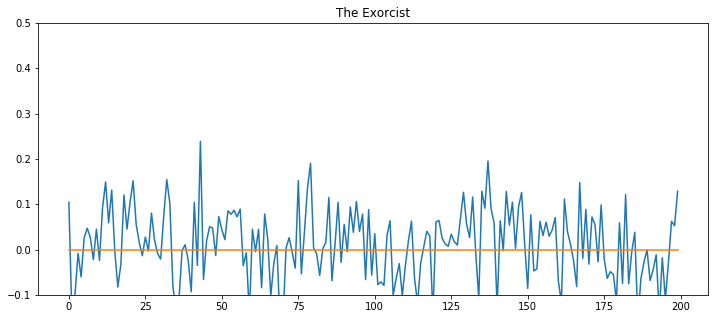

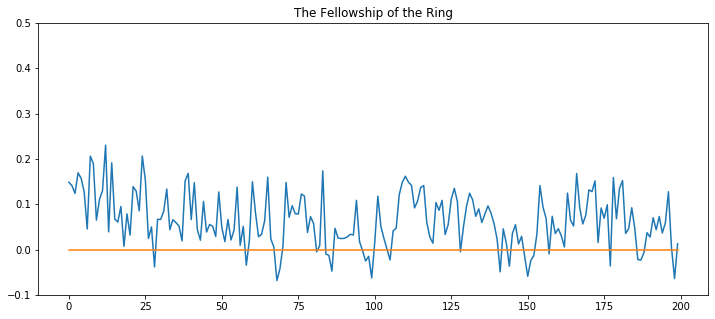

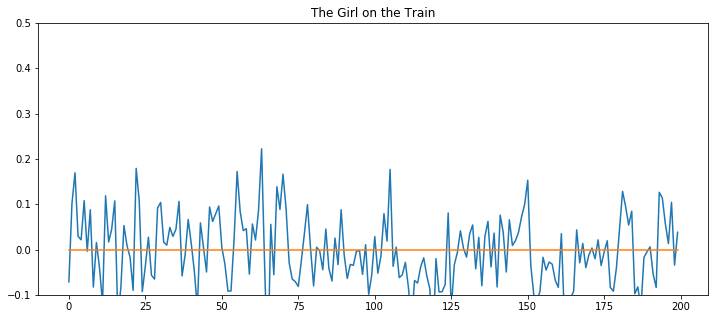

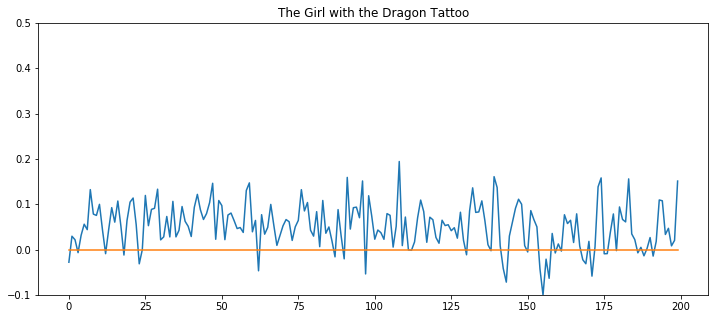

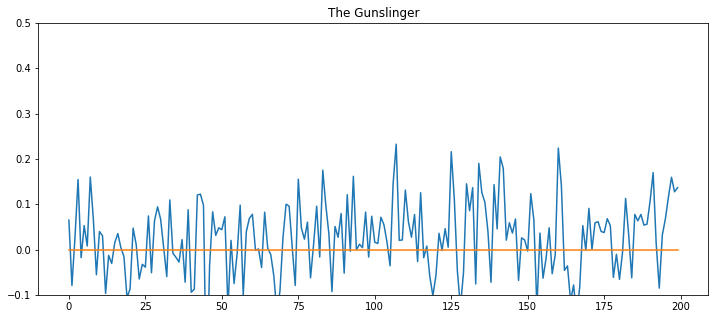

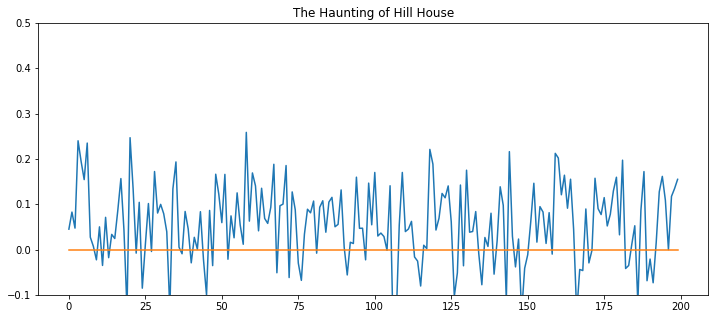

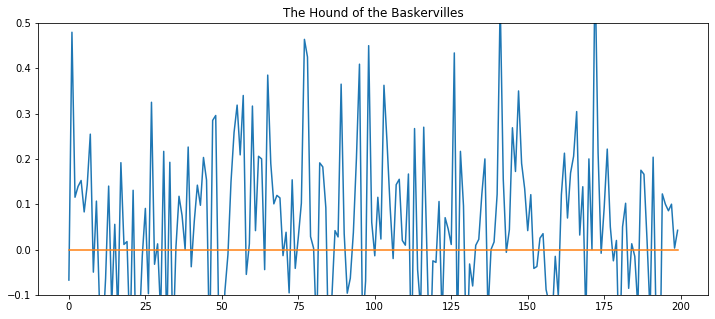

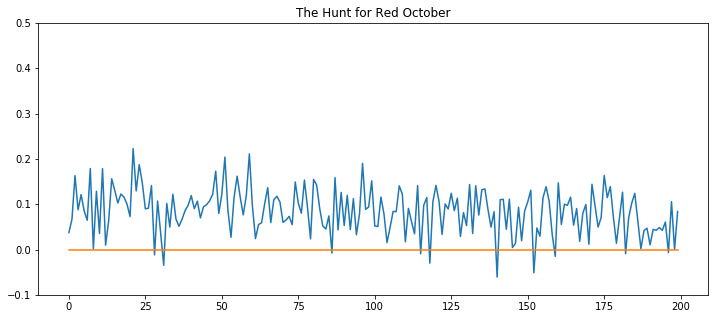

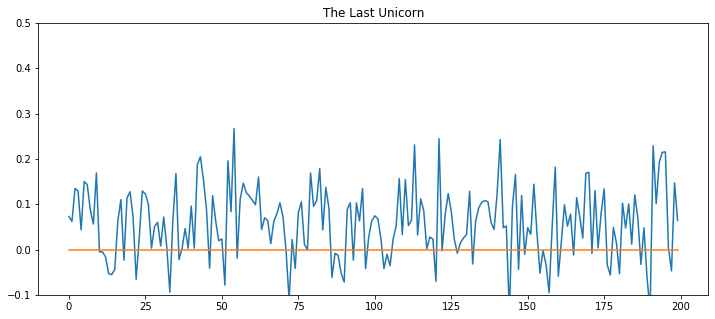

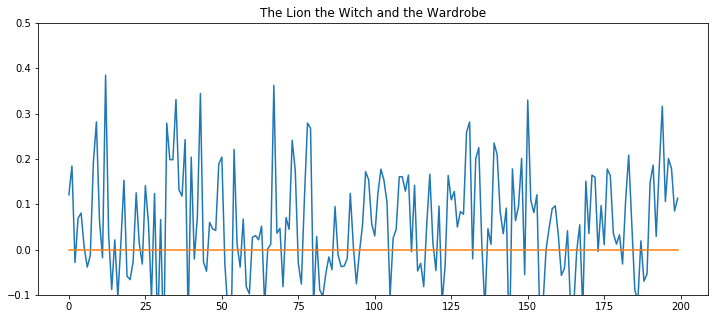

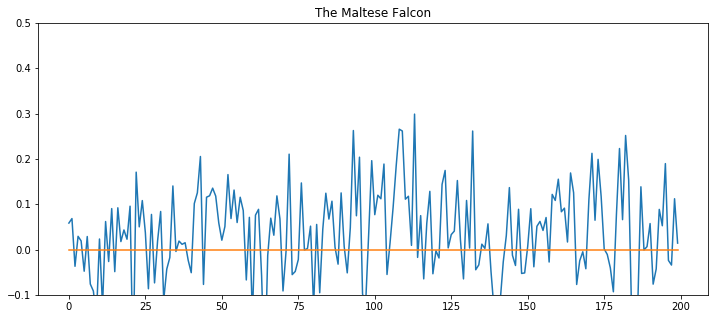

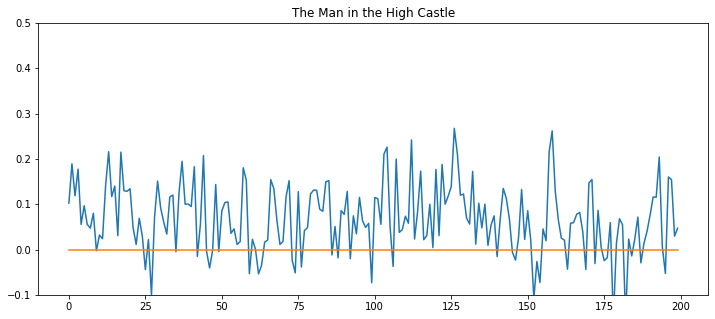

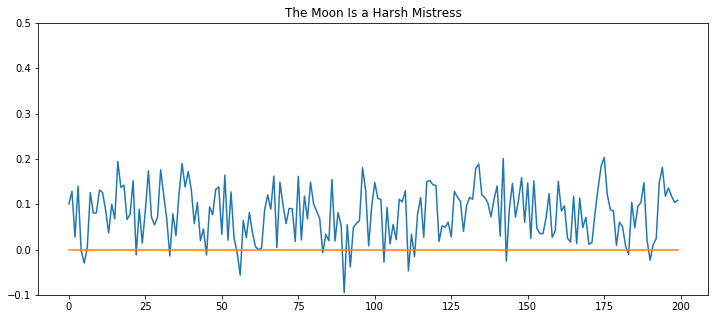

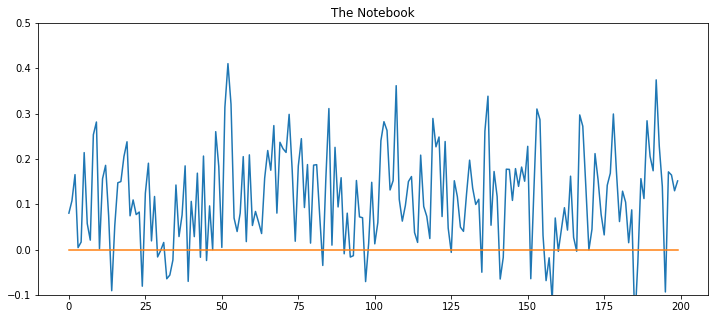

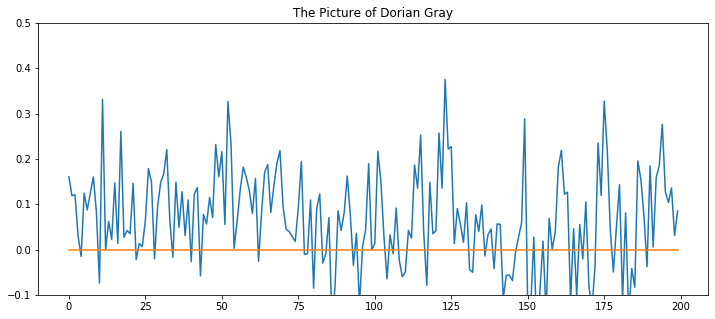

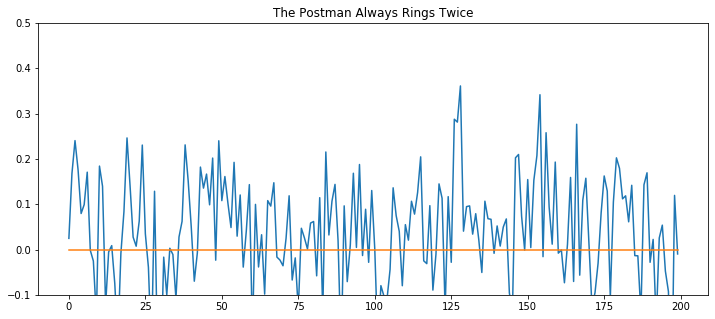

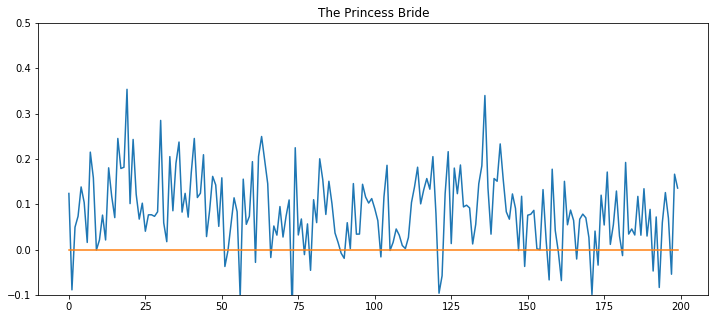

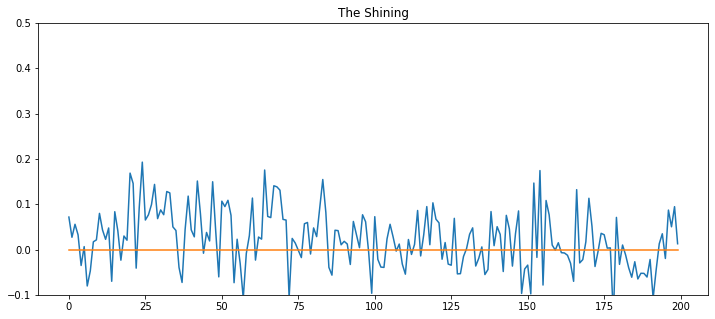

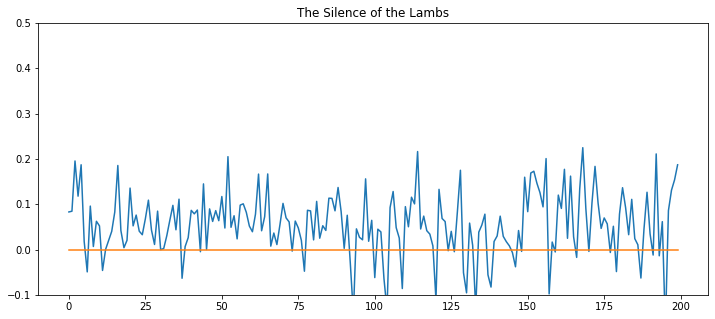

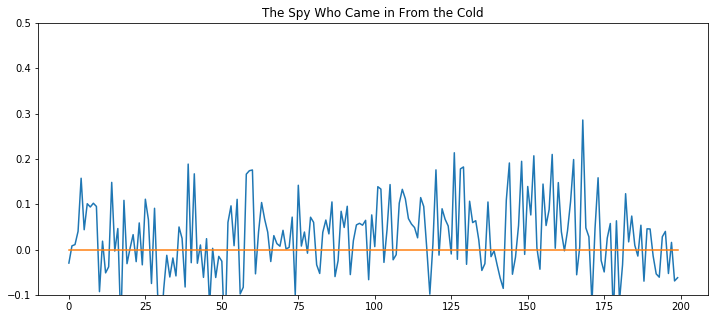

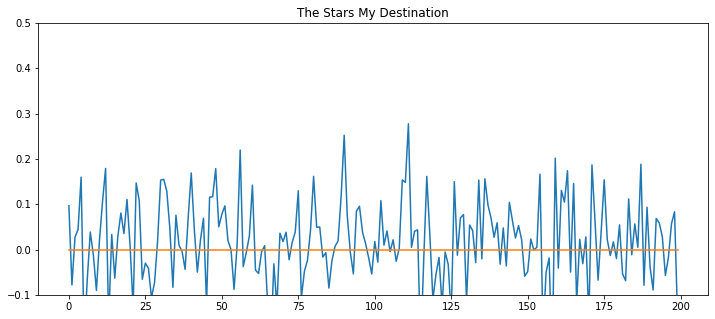

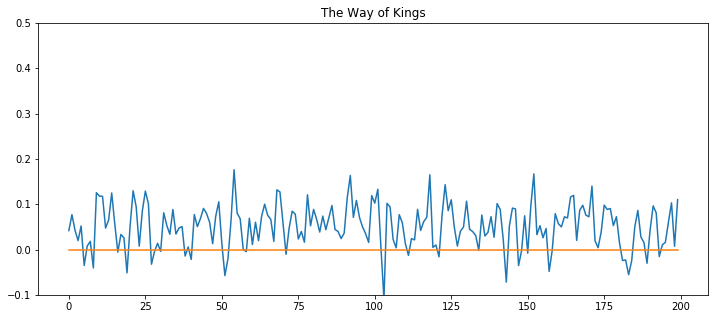

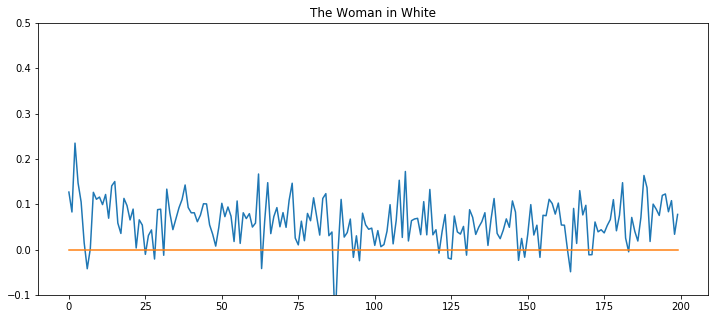

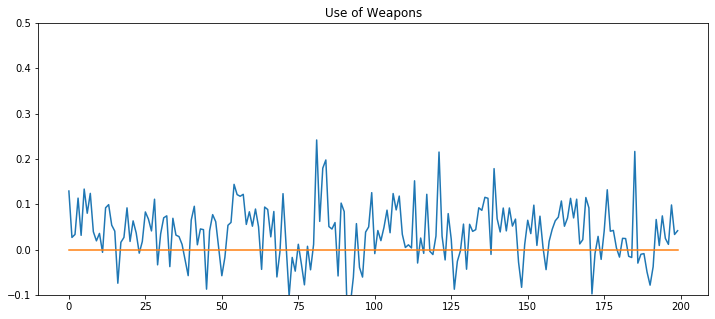

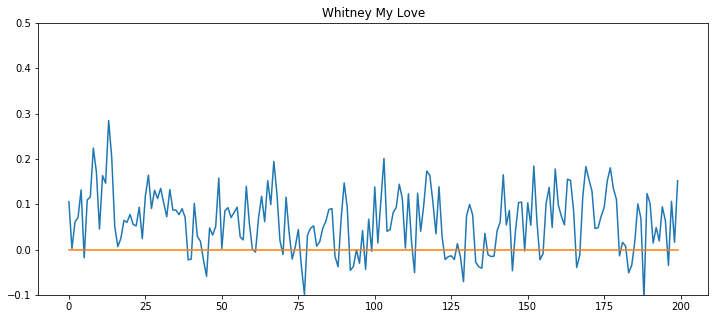

In [14]:
# Show the plot for each book
for index, book in enumerate(df.index):
    plt.figure(figsize=(12,5))
    plt.plot(polarity_text[index])
    plt.title(df.index[index])
    plt.plot(np.arange(0,200), np.zeros(200))
    plt.ylim(ymin=-.1, ymax=.5)
    plt.show()